In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Define start and end dates
start_date = '2019-01-01'
end_date = '2023-12-31'

# 2. Generate a date range
dates = pd.date_range(start=start_date, end=end_date, freq='D')

print(f"Generated date range from {start_date} to {end_date} with daily frequency.")
print(f"Total number of days: {len(dates)}")

Generated date range from 2019-01-01 to 2023-12-31 with daily frequency.
Total number of days: 1826


In [6]:
num_days = len(dates)

# 3. Create a trend component
trend = np.linspace(50, 200, num_days) # Linear trend increasing from 50 to 200

# 4. Create seasonal components
# Weekly seasonality (e.g., higher sales on weekends)
weekly_seasonality = 10 * np.sin(np.arange(num_days) * (2 * np.pi / 7)) + 5 * np.sin(np.arange(num_days) * (2 * np.pi / 7 * 2))

# Monthly seasonality (e.g., sales spikes at certain times of the month)
monthly_seasonality = 15 * np.sin(np.arange(num_days) * (2 * np.pi / 30.4)) + 7 * np.cos(np.arange(num_days) * (2 * np.pi / 30.4 * 2))

# Yearly seasonality (e.g., holiday seasons)
yearly_seasonality = 30 * np.sin(np.arange(num_days) * (2 * np.pi / 365.25)) + 15 * np.cos(np.arange(num_days) * (2 * np.pi / 365.25 * 2))

# Combine all seasonalities
seasonal_component = weekly_seasonality + monthly_seasonality + yearly_seasonality

# 5. Generate random noise
np.random.seed(42) # for reproducibility
noise = np.random.normal(loc=0, scale=10, size=num_days)

# 6. Combine all components to form the synthetic 'sales' data
sales = trend + seasonal_component + noise

# Ensure sales are not negative
sales[sales < 0] = 0

# 7. Create a pandas DataFrame
df_sales = pd.DataFrame({'sales': sales}, index=dates)
df_sales.index.name = 'date'

print("Synthetic retail sales data generated and stored in 'df_sales' DataFrame.")
print(df_sales.head())

Synthetic retail sales data generated and stored in 'df_sales' DataFrame.
                sales
date                 
2019-01-01  76.967142
2019-01-02  86.388317
2019-01-03  90.983977
2019-01-04  93.363305
2019-01-05  74.936200


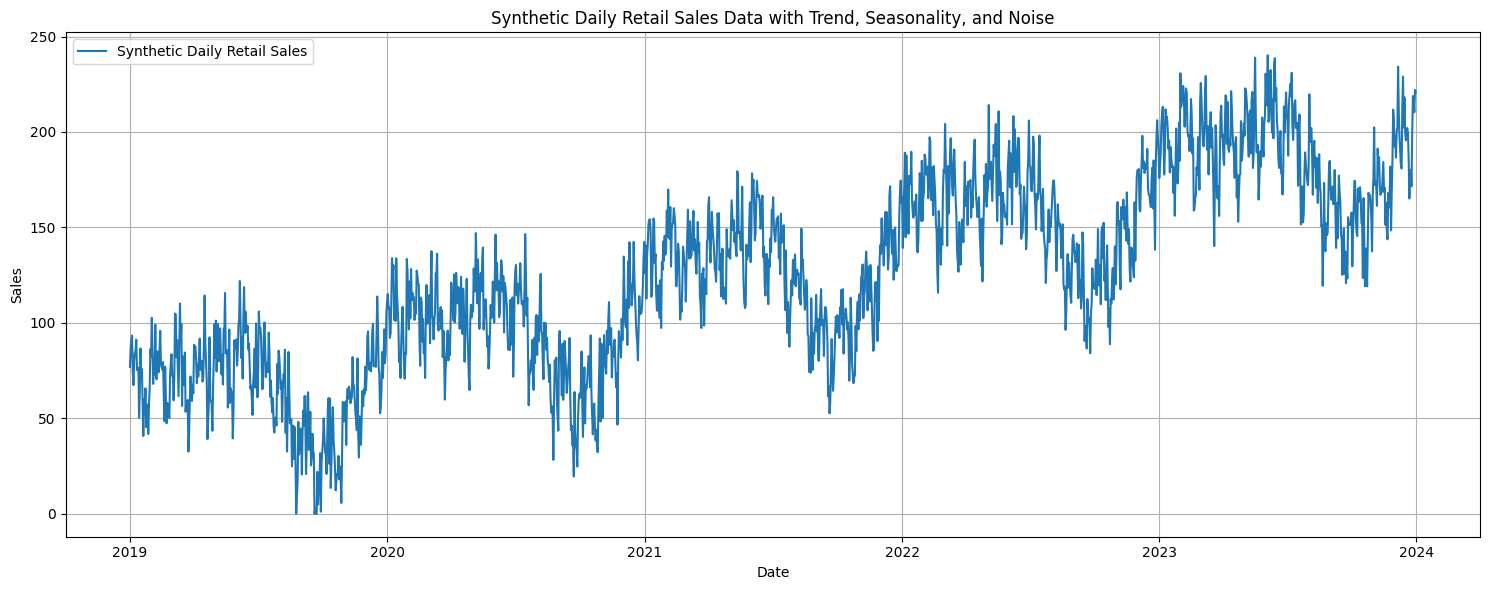

Visualized the generated synthetic retail sales data.


In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df_sales.index, df_sales['sales'], label='Synthetic Daily Retail Sales')
plt.title('Synthetic Daily Retail Sales Data with Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Visualized the generated synthetic retail sales data.")

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

print("Imported seasonal_decompose function.")

Imported seasonal_decompose function.


In [9]:
decomposition = seasonal_decompose(df_sales['sales'], model='additive', period=365)

print("Time series decomposition completed using an additive model with a period of 365 days.")

Time series decomposition completed using an additive model with a period of 365 days.


<Figure size 1500x1000 with 0 Axes>

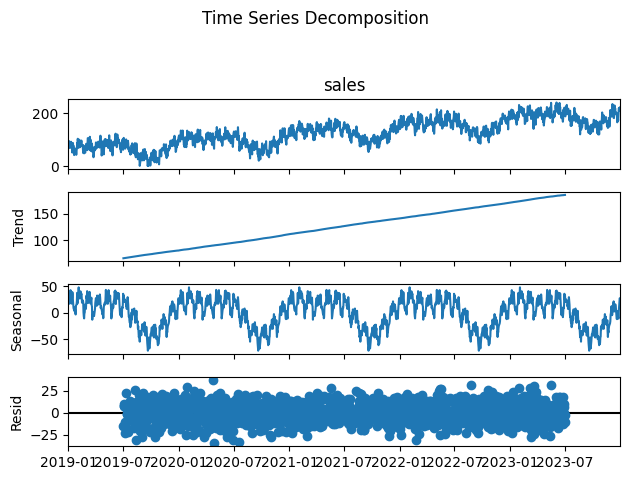

Plotted the decomposed components of the time series.


In [10]:
plt.figure(figsize=(15, 10))
decomposition.plot()
plt.suptitle('Time Series Decomposition', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

print("Plotted the decomposed components of the time series.")

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("Imported plot_acf and plot_pacf functions.")

Imported plot_acf and plot_pacf functions.


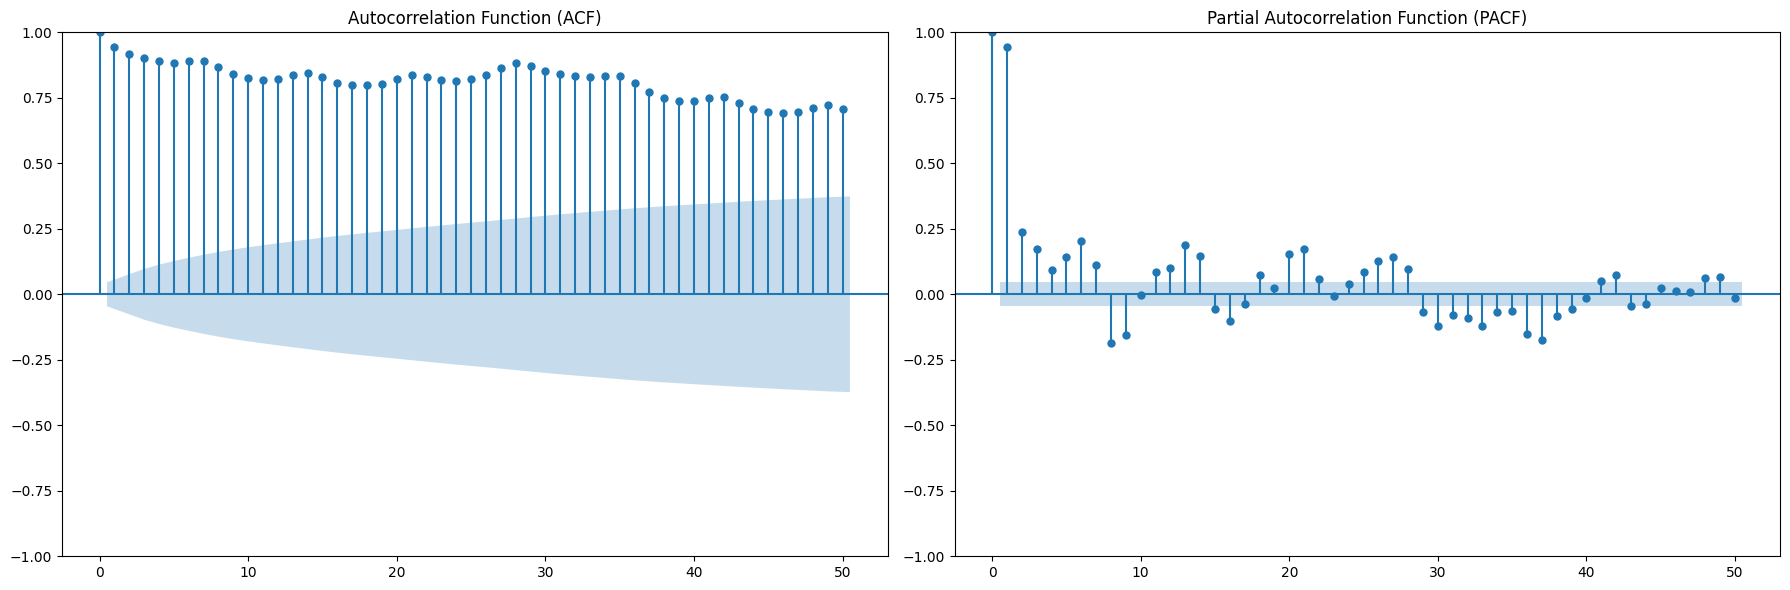

Plotted ACF and PACF for the sales data.


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plot_acf(df_sales['sales'], lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df_sales['sales'], lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

print("Plotted ACF and PACF for the sales data.")

In [13]:
from statsmodels.tsa.stattools import adfuller

print("Imported adfuller function.")

Imported adfuller function.


In [28]:
result = adfuller(df_sales['sales'])
adf_statistic = result[0]
p_value = result[1]
lags = result[2]
nobs = result[3]
critical_values = result[4]

print('ADF Statistic: %f' % adf_statistic)
print('p-value: %f' % p_value)
print('Number of lags used: %d' % lags)
print('Number of observations used: %d' % nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if p_value <= 0.05:
    print("Conclusion: The time series is likely stationary (reject the null hypothesis).")
    print("Implication: The series does not have a unit root and its statistical properties are constant over time.")
else:
    print("Conclusion: The time series is likely non-stationary (fail to reject the null hypothesis).")
    print("Implication: The series has a unit root, indicating a presence of trend or other time-dependent structures, and will likely require differencing for modeling.")


ADF Statistic: -0.640090
p-value: 0.861664
Number of lags used: 25
Number of observations used: 1800
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Conclusion: The time series is likely non-stationary (fail to reject the null hypothesis).
Implication: The series has a unit root, indicating a presence of trend or other time-dependent structures, and will likely require differencing for modeling.
